In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.use("Agg")
from scipy.stats import gaussian_kde
import sys
#import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD
#from MDAnalysis.analysis import pca, align
import pytraj as pt
import seaborn as sns
#import nglview as nv
#import warnings
# suppress some MDAnalysis warnings about writing PDB files
#warnings.filterwarnings('ignore')
#from prody import *
from pylab import *
ion()

## Reading trajectories and RMSD files

In [2]:
#Reading RMSD files run1
dimer_3b3f_rmsd = pd.read_csv('../3b3f/dimer/analysis/rmsd_byres_3b3f_dimer_400.dat', sep='\t', header=None)
monomer_3b3f_rmsd = pd.read_csv('../3b3f/monomer/analysis/rmsd_byres_3b3f_monomer_400.dat', sep='\t', header=None)
dimer_3b3j_rmsd = pd.read_csv('../3b3j/dimer/analysis/rmsd_byres_3b3j_dimer_400.dat', sep='\t', header=None )
monomer_3b3j_rmsd = pd.read_csv('../3b3j/monomer/analysis/rmsd_byres_3b3j_monomer_400.dat', sep='\t', header=None)
#Assigning df columns
dimer_3b3f_rmsd[['Frame', 'perres']] = dimer_3b3f_rmsd[0].str.split(expand=True)
monomer_3b3f_rmsd[['Frame', 'perres']] = monomer_3b3f_rmsd[0].str.split(expand=True)
dimer_3b3j_rmsd[['Frame', 'perres']] = dimer_3b3j_rmsd[0].str.split(expand=True)
monomer_3b3j_rmsd[['Frame', 'perres']] = monomer_3b3j_rmsd[0].str.split(expand=True)

# Convert the 'Frame' and 'perres' columns to numeric
def convert_to_numeric(df):
    df['Frame'] = pd.to_numeric(df['Frame'], errors='coerce')
    df['perres'] = pd.to_numeric(df['perres'], errors='coerce')
    return df
dimer_3b3f_rmsd = convert_to_numeric(dimer_3b3f_rmsd)
monomer_3b3f_rmsd = convert_to_numeric(monomer_3b3f_rmsd)
dimer_3b3j_rmsd = convert_to_numeric(dimer_3b3j_rmsd)
monomer_3b3j_rmsd = convert_to_numeric(monomer_3b3j_rmsd)
# removing the first null rows
dimer_3b3f_rmsd = dimer_3b3f_rmsd.drop(index=0)
monomer_3b3f_rmsd = monomer_3b3f_rmsd.drop(index=0)
dimer_3b3j_rmsd =dimer_3b3j_rmsd.drop(index=0)
monomer_3b3j_rmsd = monomer_3b3j_rmsd.drop(index=0)
dimer_3b3f_rmsd.head(), monomer_3b3f_rmsd.head(), dimer_3b3j_rmsd.head(), monomer_3b3j_rmsd.head()
##################################################################################################################################


(                       0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.2751    2.0  1.2751
 3         3       1.2026    3.0  1.2026
 4         4       1.3527    4.0  1.3527
 5         5       1.3434    5.0  1.3434,
                        0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.3284    2.0  1.3284
 3         3       1.2337    3.0  1.2337
 4         4       1.4719    4.0  1.4719
 5         5       1.5833    5.0  1.5833,
                        0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.2672    2.0  1.2672
 3         3       1.4554    3.0  1.4554
 4         4       1.5736    4.0  1.5736
 5         5       1.5695    5.0  1.5695,
                        0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.3759    2.0  1.3759
 3         3       1.6346    3.0  1.6346
 4         4       1.6799    4.0  1.6799
 5         5       1.8179    5.0  1.8179)

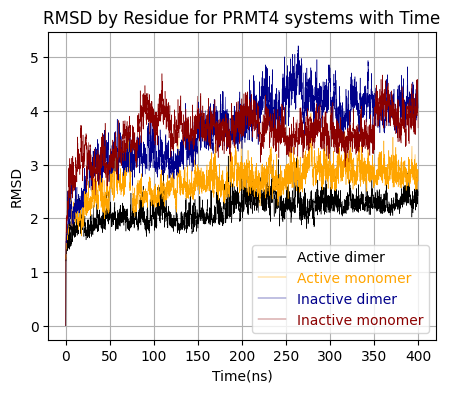

In [3]:
# Generate time axis for RMSD plot. The trajectory was saved every 0.002 ns, and we have 200000 steps.
# time = nsteps * dt
total_time = 200000000 * 0.002 /1000
time = np.linspace(0, total_time, len(dimer_3b3f_rmsd))

# Plot the data with time
%matplotlib inline
plt.figure(figsize=(5, 4))
plt.plot(time, dimer_3b3f_rmsd['perres'], label='Active dimer', color = 'black',linewidth=0.35)
plt.plot(time, monomer_3b3f_rmsd['perres'], label='Active monomer', color = 'orange',linewidth=0.35)
plt.plot(time, dimer_3b3j_rmsd['perres'], label='Inactive dimer', color = 'darkblue',linewidth=0.35)
plt.plot(time, monomer_3b3j_rmsd['perres'], label='Inactive monomer', color = 'darkred',linewidth=0.35)
plt.xlabel('Time(ns)')
plt.ylabel('RMSD')
plt.title('RMSD by Residue for PRMT4 systems with Time')
plt.grid(True)
plt.legend(labelcolor='linecolor')
plt.show()
#################################################################################

In [9]:
#dimer_3b3f_rmsd_avg = pd.read_csv('../3b3f/dimer/analysis/3b3fdimerperresavg.dat', sep='\t', header=None)
#monomer_3b3f_rmsd_avg = pd.read_csv('../3b3f/monomer/analysis/3b3fmonomerperresavg.dat', sep='\t', header=None)
#dimer_3b3j_rmsd_avg = pd.read_csv('../3b3j/dimer/analysis/3b3jdimerperresavg.dat', sep='\t', header=None )
#monomer_3b3j_rmsd_avg = pd.read_csv('../3b3j/monomer/analysis/3b3jmonomerperresavg.dat', sep='\t', header=None)
#
#dimer_3b3f_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = dimer_3b3f_rmsd_avg[0].str.split(expand=True)
#monomer_3b3f_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = monomer_3b3f_rmsd_avg[0].str.split(expand=True)
#dimer_3b3j_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = dimer_3b3j_rmsd_avg[0].str.split(expand=True)
#monomer_3b3j_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = monomer_3b3j_rmsd_avg[0].str.split(expand=True)
#
## Convert the 'Frame' and 'perres' columns to numeric
#def convert_to_numeric(df):
#    df['Residue'] = pd.to_numeric(df['Residue'], errors='coerce')
#    df['reference[Avg]'] = pd.to_numeric(df['reference[Avg]'], errors='coerce')
#    df['reference[Stdev]'] = pd.to_numeric(df['reference[Stdev]'], errors='coerce')
#    return df
#
#dimer_3b3f_rmsd_avg = convert_to_numeric(dimer_3b3f_rmsd_avg)
#monomer_3b3f_rmsd_avg = convert_to_numeric(monomer_3b3f_rmsd_avg)
#dimer_3b3j_rmsd_avg = convert_to_numeric(dimer_3b3j_rmsd_avg)
#monomer_3b3j_rmsd_avg = convert_to_numeric(monomer_3b3j_rmsd_avg)
#
## removing the first null rows
#dimer_3b3f_rmsd_avg = dimer_3b3f_rmsd_avg.drop(index=0)
#monomer_3b3f_rmsd_avg = monomer_3b3f_rmsd_avg.drop(index=0)
#dimer_3b3j_rmsd_avg =dimer_3b3j_rmsd_avg.drop(index=0)
#monomer_3b3j_rmsd_avg = monomer_3b3j_rmsd_avg.drop(index=0)
#
#monomer_3b3f_rmsd_avg.head()

In [10]:
##########################################################################################################################################
# Renumbering the residues active dimer
# Define the length of the new numbering sequence
#start_residue = 134
#new_length = 345
## Reassign the 'Res' column to a new range of values
#dimer_3b3f_rmsd_avg['Residue'] = np.tile(range(start_residue, start_residue + new_length), len(dimer_3b3f_rmsd_avg) // new_length + 1)[:len(dimer_3b3f_rmsd_avg)]
## Renumbering the residues active monomer
#start_residue = 134
#new_length = 345
## Reassign the 'Res' column to a new range of values from 1 to 345
#monomer_3b3f_rmsd_avg['Residue'] = np.tile(range(start_residue, start_residue + new_length), len(monomer_3b3f_rmsd_avg) // new_length + 1)[:len(monomer_3b3f_rmsd_avg)]

## Renumbering the residues inactive dimer
## Define the length of the new numbering sequence
#start_residue_inactive = 155
#new_length_inactive = 324
## Reassign the 'Res' column to a new range of values from 1 to 345
#dimer_3b3j_rmsd_avg['Residue'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(dimer_3b3j_rmsd_avg) // new_length_inactive + 1)[:len(dimer_3b3j_rmsd_avg)]
#
## Renumbering the residues inactive monomer
## Define the length of the new numbering sequence
#start_residue_inactive = 155
#new_length_inactive = 324
## Reassign the 'Res' column to a new range of values from 1 to 345
#monomer_3b3j_rmsd_avg['Residue'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(monomer_3b3j_rmsd_avg) // new_length_inactive + 1)[:len(monomer_3b3j_rmsd_avg)]
#dimer_3b3f_rmsd_avg.head()
########################################################################################################################################################

In [11]:
## active RMSD plotting
#start_indexA = 1
#end_indexA = 345
#res_rangeA1 = dimer_3b3f_rmsd_avg.loc[start_indexA:end_indexA, 'Residue']
#RMSD_avg_rangeA1 = dimer_3b3f_rmsd_avg.loc[start_indexA:end_indexA, 'reference[Avg]']
#
#start_indexB = 346
#end_indexB = 690
#res_rangeB1 = dimer_3b3f_rmsd_avg.loc[start_indexB:end_indexB, 'Residue']
#RMSD_avg_rangeB1 = dimer_3b3f_rmsd_avg.loc[start_indexB:end_indexB, 'reference[Avg]']
#
#%matplotlib inline
#plt.figure(figsize=(10, 5))
#
#plt.plot(res_rangeA1,RMSD_avg_rangeA1, color='black', label='activeD chainA')
#plt.plot(res_rangeB1,RMSD_avg_rangeB1, color='blue', label='activeD chainB')
#
#plt.plot(monomer_3b3f_rmsd_avg['Residue'], monomer_3b3f_rmsd_avg['reference[Avg]'], color='red', label='activeM')
#plt.axvspan(300,338, facecolor = 'mediumpurple', label ='Dimerization arm')
#plt.axvspan(149,155, facecolor = 'silver', label ='Cofactor')
#plt.axvspan(138,138, facecolor = 'silver')
#plt.axvspan(160,160, facecolor = 'silver')
#plt.axvspan(164,164, facecolor = 'silver')
#plt.axvspan(169,169, facecolor = 'silver')
#plt.axvspan(191,191, facecolor = 'silver')
#plt.axvspan(193,193, facecolor = 'silver')
#plt.axvspan(196,196, facecolor = 'silver')
#plt.axvspan(214,216, facecolor = 'silver')
#plt.axvspan(242,245, facecolor = 'silver')
#plt.axvspan(272,272, facecolor = 'silver')
#plt.axvspan(159,159, facecolor = 'lightcoral', label ='Substrate site')
#plt.axvspan(146,146, facecolor = 'lightcoral')
#plt.axvspan(161,163, facecolor = 'lightcoral')
#plt.axvspan(166,168, facecolor = 'lightcoral')
#plt.axvspan(257,260, facecolor = 'lightcoral')
#plt.axvspan(262,262, facecolor = 'lightcoral')
#plt.axvspan(266,269, facecolor = 'lightcoral')
#plt.axvspan(287,287, facecolor = 'lightcoral')
#plt.axvspan(415,417, facecolor = 'lightcoral')
#plt.axvspan(446,447, facecolor = 'lightcoral')
#plt.axvspan(473,477, facecolor = 'lightcoral')
#
#plt.xlabel('Residue Number')
#plt.ylabel('Avg RMSD')
#plt.title('Avg RMSD per residue for active systems dimer and monomer')
#plt.legend()
##plt.grid(True)
#plt.xticks(np.arange(130, 500, 10.0))
#plt.xticks(rotation=90)
#plt.show()
#########################################################################################################################

# RMSF

In [4]:
# Reading the RMSF files run 1
dimer_3b3f_rmsf = pd.read_csv('../3b3f/dimer/analysis/rmsf_3b3f_dimer_400.dat', sep=r'\s+', header=None)
monomer_3b3f_rmsf = pd.read_csv('../3b3f/monomer/analysis/rmsf_3b3f_monomer_400.dat', sep=r'\s+', header=None)
dimer_3b3j_rmsf = pd.read_csv('../3b3j/dimer/analysis/rmsf_3b3j_dimer_400.dat', sep=r'\s+', header=None)
monomer_3b3j_rmsf = pd.read_csv('../3b3j/monomer/analysis/rmsf_3b3j_monomer_400.dat', sep=r'\s+', header=None)
#Assigning names to columns
dimer_3b3f_rmsf.columns = ['Res', 'AtomicFlx']
monomer_3b3f_rmsf.columns = ['Res', 'AtomicFlx']
dimer_3b3j_rmsf.columns = ['Res', 'AtomicFlx']
monomer_3b3j_rmsf.columns = ['Res', 'AtomicFlx']
# removing the first null rows
dimer_3b3f_rmsf= dimer_3b3f_rmsf.drop(index=0)
monomer_3b3f_rmsf = monomer_3b3f_rmsf.drop(index=0)
dimer_3b3j_rmsf =dimer_3b3j_rmsf.drop(index=0)
monomer_3b3j_rmsf = monomer_3b3j_rmsf.drop(index=0)
##########################################################################################################################################

In [5]:
# Renumbering the residues active dimer
# Define the length of the new numbering sequence
start_residue = 153
new_length = 326
# Reassign the 'Res' column to a new range of values
dimer_3b3f_rmsf['Res'] = np.tile(range(start_residue, start_residue + new_length), len(dimer_3b3f_rmsf) // new_length + 1)[:len(dimer_3b3f_rmsf)]
# Renumbering the residues active monomer
start_residue = 153
new_length = 326
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3f_rmsf['Res'] = np.tile(range(start_residue, start_residue + new_length), len(monomer_3b3f_rmsf) // new_length + 1)[:len(monomer_3b3f_rmsf)]

# Renumbering the residues inactive dimer
# Define the length of the new numbering sequence
start_residue_inactive = 153
new_length_inactive = 326
# Reassign the 'Res' column to a new range of values from 1 to 345
dimer_3b3j_rmsf['Res'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(dimer_3b3j_rmsf) // new_length_inactive + 1)[:len(dimer_3b3j_rmsf)]

# Renumbering the residues inactive monomer
# Define the length of the new numbering sequence
start_residue_inactive = 153
new_length_inactive = 326
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3j_rmsf['Res'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(monomer_3b3j_rmsf) // new_length_inactive + 1)[:len(monomer_3b3j_rmsf)]
#######################################################################################################################################################
# active Dimer
# Adding chain dataframe
# Calculate the number of rows in the dataframe
num_rows = len(dimer_3b3f_rmsf)
# Create a list of values with half "value1" and half "value2"
half_length = num_rows // 2
values = ["chain_A"] * half_length + ["chain_B"] * (num_rows - half_length)
# Add the new column to the dataframe
dimer_3b3f_rmsf ['Chain'] = values

## active Monomer
# Adding chain dataframe
valuesM = ["chain_A"] * len(monomer_3b3f_rmsf)
# Add the new column to the dataframe
monomer_3b3f_rmsf ['Chain'] = valuesM

# inactive Dimer
# Adding chain dataframe
# Calculate the number of rows in the dataframe
num_rows_inactive = len(dimer_3b3j_rmsf)
# Create a list of values with half "value1" and half "value2"
half_length_inactive = num_rows_inactive // 2
values_inactive = ["chain_A"] * half_length_inactive + ["chain_B"] * (num_rows_inactive - half_length_inactive)
# Add the new column to the dataframe
dimer_3b3j_rmsf ['Chain'] = values_inactive

# inactive Monomer
# Adding chain dataframe
values_inactiveM = ["chain_A"] * len(monomer_3b3j_rmsf)
# Add the new column to the dataframe
monomer_3b3j_rmsf ['Chain'] = values_inactiveM

# Convert the "AtomicFlx" column to numeric
dimer_3b3f_rmsf["AtomicFlx"] = pd.to_numeric(dimer_3b3f_rmsf["AtomicFlx"], errors='coerce')
monomer_3b3f_rmsf["AtomicFlx"] = pd.to_numeric(monomer_3b3f_rmsf["AtomicFlx"], errors='coerce')
dimer_3b3j_rmsf["AtomicFlx"] = pd.to_numeric(dimer_3b3j_rmsf["AtomicFlx"], errors='coerce')
monomer_3b3j_rmsf["AtomicFlx"] = pd.to_numeric(monomer_3b3j_rmsf["AtomicFlx"], errors='coerce')
dimer_3b3f_rmsf.head(),dimer_3b3f_rmsf.tail(),monomer_3b3f_rmsf.head(),monomer_3b3f_rmsf.tail(),dimer_3b3j_rmsf.head(),dimer_3b3j_rmsf.tail(),monomer_3b3j_rmsf.head(),monomer_3b3j_rmsf.tail()
#######################################################################################################################################################

(   Res  AtomicFlx    Chain
 1  153     6.0200  chain_A
 2  154     6.5078  chain_A
 3  155     2.3991  chain_A
 4  156     2.1074  chain_A
 5  157     1.2784  chain_A,
      Res  AtomicFlx    Chain
 648  474     1.4815  chain_B
 649  475     2.2296  chain_B
 650  476     1.3462  chain_B
 651  477     3.9105  chain_B
 652  478     5.3313  chain_B,
    Res  AtomicFlx    Chain
 1  153     5.0565  chain_A
 2  154     4.1800  chain_A
 3  155     2.2880  chain_A
 4  156     3.3293  chain_A
 5  157     2.3607  chain_A,
      Res  AtomicFlx    Chain
 322  474     1.1171  chain_A
 323  475     1.8941  chain_A
 324  476     1.2076  chain_A
 325  477     3.0591  chain_A
 326  478     3.7188  chain_A,
    Res  AtomicFlx    Chain
 1  153     1.6475  chain_A
 2  154     1.8915  chain_A
 3  155     1.8964  chain_A
 4  156     3.3888  chain_A
 5  157     2.0307  chain_A,
      Res  AtomicFlx    Chain
 648  474     2.0762  chain_B
 649  475     2.3748  chain_B
 650  476     1.9020  chain_B
 651  477  

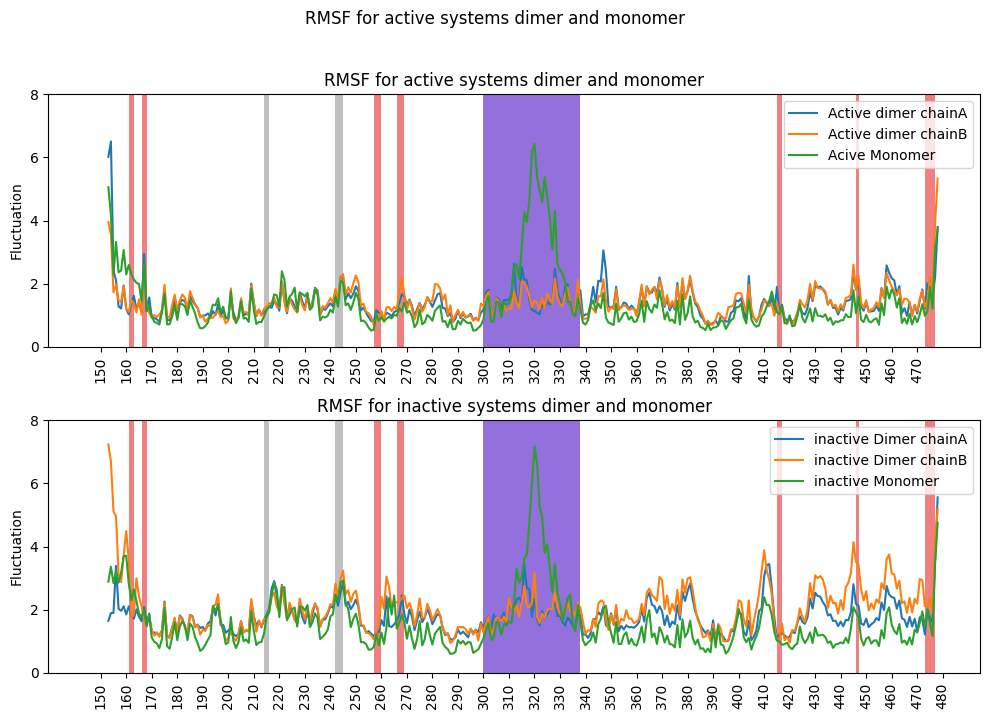

In [11]:
# Define the start and end indices for the different chains
start_indexA = 1
end_indexA = 326
start_indexB = 327
end_indexB = 652

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

# Highlighted regions
highlighted_regions = [
    (300, 338, 'mediumpurple', 'Dimerization arm'),
    (160, 160, 'silver', 'Cofactor'),
    (164, 164, 'silver', ''),
    (169, 169, 'silver', ''),
    (191, 191, 'silver', ''),
    (193, 193, 'silver', ''),
    (196, 196, 'silver', ''),
    (214, 216, 'silver', ''),
    (242, 245, 'silver', ''),
    (272, 272, 'silver', ''),
    (159, 159, 'lightcoral', 'Substrate site'),
    (146, 146, 'lightcoral', ''),
    (161, 163, 'lightcoral', ''),
    (166, 168, 'lightcoral', ''),
    (257, 260, 'lightcoral', ''),
    (262, 262, 'lightcoral', ''),
    (266, 269, 'lightcoral', ''),
    (287, 287, 'lightcoral', ''),
    (415, 417, 'lightcoral', ''),
    (446, 447, 'lightcoral', ''),
    (473, 477, 'lightcoral', '')
]

# Plot for subplot 1
axs[0].plot(dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'Res'], dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'AtomicFlx'], label='Active dimer chainA')
axs[0].plot(dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'Res'], dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'AtomicFlx'], label='Active dimer chainB')
axs[0].plot(monomer_3b3f_rmsf['Res'], monomer_3b3f_rmsf['AtomicFlx'], label='Acive Monomer')
axs[0].set_title('RMSF for active systems dimer and monomer')
axs[0].set_ylabel('Fluctuation')
axs[0].legend()
#axs[0].grid(True)
axs[0].set_xticks(np.arange(150, 480, 10.0))
axs[0].set_yticks(np.arange(0, 10, 2))
axs[0].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[0].axvspan(start, end, facecolor=color, label=label)

# Define the start and end indices for the different chains
start_index_inactiveA = 1
end_index_inactiveA = 326
start_index_inactiveB = 327
end_index_inactiveB = 652

# Plot for subplot 1
axs[1].plot(dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'AtomicFlx'], label='inactive Dimer chainA')
axs[1].plot(dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'AtomicFlx'], label='inactive Dimer chainB')
axs[1].plot(monomer_3b3j_rmsf['Res'], monomer_3b3j_rmsf['AtomicFlx'], label='inactive Monomer')
axs[1].set_title('RMSF for inactive systems dimer and monomer')
axs[1].set_ylabel('Fluctuation')
axs[1].legend()
#axs[1].grid(True)
axs[1].set_xticks(np.arange(150, 490, 10.0))
axs[1].set_yticks(np.arange(0, 10, 2))
axs[1].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[1].axvspan(start, end, facecolor=color, label=label)
    
# Title for the whole plot
plt.suptitle('RMSF for active systems dimer and monomer', y=1.02)

plt.tight_layout()
plt.show()

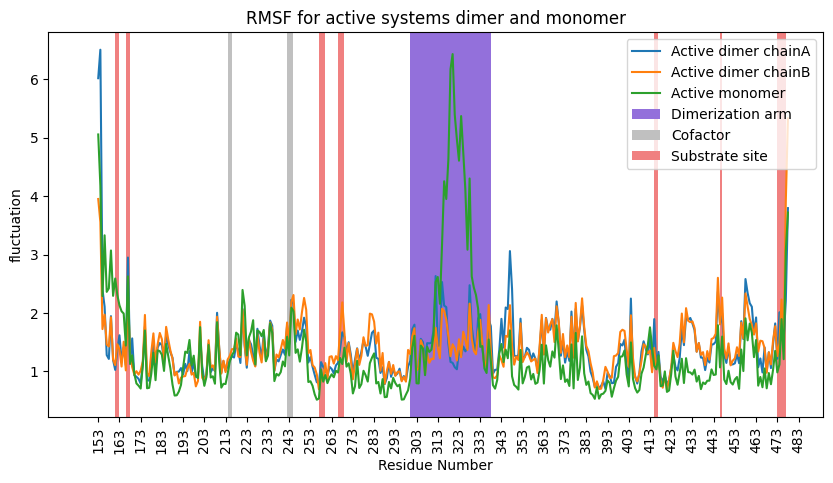

In [9]:
# active RMSF plotting
%matplotlib inline
plt.figure(figsize=(10, 5))
start_indexA = 1
end_indexA = 326
res_rangeA1 = dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'Res']
fluct_rangeA1 = dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'AtomicFlx']
plt.plot(res_rangeA1,fluct_rangeA1, label='Active dimer chainA')

start_indexB = 327
end_indexB = 652
res_rangeB1 = dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'Res']
fluct_rangeB1 = dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'AtomicFlx']
plt.plot(res_rangeB1,fluct_rangeB1, label='Active dimer chainB')

plt.plot(monomer_3b3f_rmsf['Res'], monomer_3b3f_rmsf['AtomicFlx'], label='Active monomer')

plt.xlabel('Residue Number')
plt.axvspan(300,338, facecolor = 'mediumpurple', label ='Dimerization arm')

plt.axvspan(160,160, facecolor = 'silver', label ='Cofactor')
plt.axvspan(164,164, facecolor = 'silver')
plt.axvspan(169,169, facecolor = 'silver')
plt.axvspan(191,191, facecolor = 'silver')
plt.axvspan(193,193, facecolor = 'silver')
plt.axvspan(196,196, facecolor = 'silver')
plt.axvspan(214,216, facecolor = 'silver')
plt.axvspan(242,245, facecolor = 'silver')
plt.axvspan(272,272, facecolor = 'silver')
plt.axvspan(159,159, facecolor = 'lightcoral', label ='Substrate site')
plt.axvspan(146,146, facecolor = 'lightcoral')
plt.axvspan(161,163, facecolor = 'lightcoral')
plt.axvspan(166,168, facecolor = 'lightcoral')
plt.axvspan(257,260, facecolor = 'lightcoral')
plt.axvspan(262,262, facecolor = 'lightcoral')
plt.axvspan(266,269, facecolor = 'lightcoral')
plt.axvspan(287,287, facecolor = 'lightcoral')
plt.axvspan(415,417, facecolor = 'lightcoral')
plt.axvspan(446,447, facecolor = 'lightcoral')
plt.axvspan(473,477, facecolor = 'lightcoral')
plt.ylabel('fluctuation')
plt.title('RMSF for active systems dimer and monomer')
plt.legend()
#plt.grid(True)
plt.xticks(np.arange(153, 490, 10.0))
plt.xticks(rotation=90)
plt.show()
##############################################################################################################3


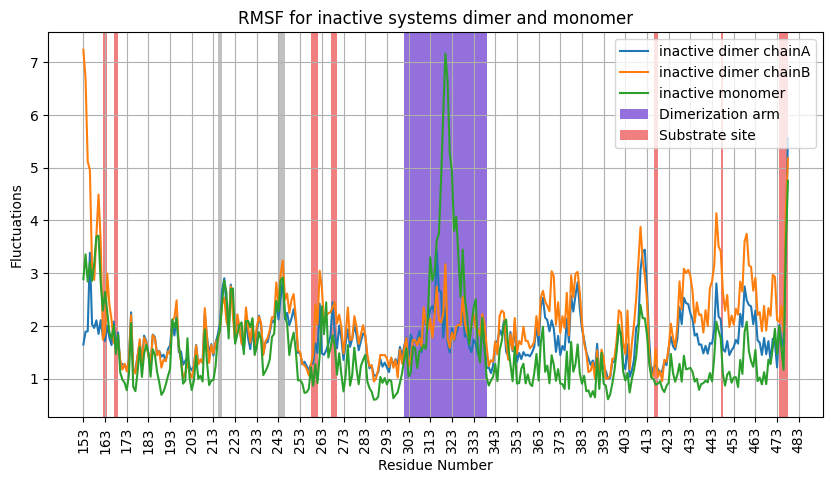

In [10]:
# inactive RMSF plotting run 1
plt.figure(figsize=(10, 5))
start_index_inactiveA = 1
end_index_inactiveA = 326
res_range_inactiveA1 = dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'Res']
fluct_range_inactiveA1 = dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'AtomicFlx']
plt.plot(res_range_inactiveA1,fluct_range_inactiveA1, label='inactive dimer chainA')

start_index_inactiveB = 327
end_index_inactiveB = 652
res_range_inactiveB1 = dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'Res']
fluct_range_inactiveB1 = dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'AtomicFlx']
plt.plot(res_range_inactiveB1,fluct_range_inactiveB1, label='inactive dimer chainB')

plt.plot(monomer_3b3j_rmsf['Res'], monomer_3b3j_rmsf['AtomicFlx'], label='inactive monomer')

plt.xlabel('Residue Number')
plt.axvspan(301,339, facecolor = 'mediumpurple', label ='Dimerization arm')
plt.axvspan(161,161, facecolor = 'silver')
plt.axvspan(165,165, facecolor = 'silver')
plt.axvspan(170,170, facecolor = 'silver')
plt.axvspan(192,192, facecolor = 'silver')
plt.axvspan(194,194, facecolor = 'silver')
plt.axvspan(197,197, facecolor = 'silver')
plt.axvspan(215,217, facecolor = 'silver')
plt.axvspan(243,246, facecolor = 'silver')
plt.axvspan(273,273, facecolor = 'silver')
plt.axvspan(160,160, facecolor = 'lightcoral', label ='Substrate site')
plt.axvspan(162,164, facecolor = 'lightcoral')
plt.axvspan(167,169, facecolor = 'lightcoral')
plt.axvspan(258,261, facecolor = 'lightcoral')
plt.axvspan(263,263, facecolor = 'lightcoral')
plt.axvspan(267,270, facecolor = 'lightcoral')
plt.axvspan(288,288, facecolor = 'lightcoral')
plt.axvspan(416,418, facecolor = 'lightcoral')
plt.axvspan(447,448, facecolor = 'lightcoral')
plt.axvspan(474,478, facecolor = 'lightcoral')

plt.xlabel('Residue Number')
plt.ylabel('Fluctuations')
plt.title('RMSF for inactive systems dimer and monomer')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(153, 490, 10.0))
plt.xticks(rotation=90)
plt.show()

# Correlation

In [14]:
corrmatactiveD=pd.read_csv('../3b3f/dimer/analysis/corr_3b3f_Dimer.dat',sep=r'\s+')
corrmatactiveM=pd.read_csv('../3b3f/monomer/analysis/corr_3b3f_Monomer.dat',sep=r'\s+')
#corrmatinactiveD=pd.read_csv('../3b3j/dimer/analysis/corr_3b3j_Dimer.dat',sep=r'\s+')
#corrmatinactiveM=pd.read_csv('../3b3j/monomer/analysis/corr_3b3j_Monomer.dat',sep=r'\s+')

#Renaming the first column
corrmatactiveD.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
corrmatactiveM.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
#corrmatinactiveD.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
#corrmatinactiveM.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)


corrFilesList= (corrmatactiveD, corrmatactiveM) #,corrmatinactiveD, corrmatinactiveM)
for df in corrFilesList:
    first_column_label = df.columns[0]  # Assuming the first column is at index 0
    df.drop(first_column_label, axis=1, inplace=True)

In [29]:
corrmatactiveD.tail()

,1,2,3,4,5,6,7,8,9,10,...,643,644,645,646,647,648,649,650,651,652
647,0.1557,0.2328,0.2863,0.3441,0.4077,0.4253,0.3129,0.3204,0.4413,0.3108,...,0.5994,0.5999,0.5803,0.6011,0.7062,0.0000,0.6504,0.6938,0.5445,0.4655
648,0.1262,0.1916,0.2199,0.2784,0.3256,0.3447,0.2547,0.2450,0.3464,0.2486,...,0.5258,0.5273,0.5191,0.5384,0.6342,0.6504,0.0000,0.7189,0.6458,0.5041
649,0.1152,0.1953,0.2377,0.2951,0.3637,0.3888,0.2777,0.2859,0.4171,0.2869,...,0.5089,0.5173,0.4771,0.5028,0.5791,0.6938,0.7189,0.0000,0.7227,0.6090
650,0.0880,0.1511,0.1791,0.2318,0.2724,0.2940,0.2124,0.2004,0.2992,0.2076,...,0.4010,0.4132,0.3906,0.4173,0.4778,0.5445,0.6458,0.7227,0.0000,0.6464
651,0.0590,0.1177,0.1467,0.1911,0.2204,0.2472,0.1676,0.1604,0.2581,0.1784,...,0.3173,0.3273,0.3096,0.3312,0.3746,0.4655,0.5041,0.6090,0.6464,0.0000


In [32]:
#Rename the residues of the activeD correlation dataframes
activeDcorrList = (corrmatactiveD)

# Generate new column names
new_column_names = [f"{i}A" for i in range(153, 479)]
new_column_names.extend([f"{i}B" for i in range(153, 479)])
# Append 'SAHA' and 'SAHB' to the list
#new_column_names.extend(['SAHA', 'SAHB'])
activeDcorrList.columns = new_column_names

# Generate new row names
new_row_names = [f"{i}A" for i in range(153, 479)]
new_row_names.extend([f"{i}B" for i in range(153, 479)])
# Append 'SAHA' and 'SAHB' to the list
#new_row_names.extend(['SAHA', 'SAHB'])
activeDcorrList.index = new_row_names

# Display the DataFrame with new column names
corrmatactiveD.head()


,153A,154A,155A,156A,157A,158A,159A,160A,161A,162A,...,469B,470B,471B,472B,473B,474B,475B,476B,477B,478B
153A,0.0000,0.5534,0.4585,0.3852,0.3065,0.3132,0.3524,0.3160,0.2388,0.1968,...,0.1994,0.1763,0.1734,0.1727,0.1707,0.1557,0.1262,0.1152,0.0880,0.0590
154A,0.5534,0.0000,0.6812,0.5289,0.4411,0.4253,0.4296,0.4270,0.3388,0.2761,...,0.2995,0.2698,0.2643,0.2679,0.2589,0.2328,0.1916,0.1953,0.1511,0.1177
155A,0.4585,0.6812,0.0000,0.6728,0.5867,0.5424,0.5188,0.5519,0.4401,0.3440,...,0.3432,0.3061,0.3022,0.3068,0.2950,0.2863,0.2199,0.2377,0.1791,0.1467
156A,0.3852,0.5289,0.6728,0.0000,0.6348,0.6160,0.5828,0.5404,0.4791,0.3814,...,0.4006,0.3683,0.3578,0.3740,0.3601,0.3441,0.2784,0.2951,0.2318,0.1911
157A,0.3065,0.4411,0.5867,0.6348,0.0000,0.7860,0.5925,0.6963,0.7009,0.5203,...,0.4598,0.4115,0.3906,0.4126,0.4027,0.4077,0.3256,0.3637,0.2724,0.2204


In [64]:
#Rename the residues of the activeM correlation dataframes
activeMcorrList = (corrmatactiveM)
# Generate new column names
new_column_namesactiveM = [f"{i}A" for i in range(153, 479)]
activeMcorrList.columns = new_column_namesactiveM

# Generate new row names
new_row_namesactiveM = [f"{i}A" for i in range(153, 479)]
activeMcorrList.index = new_row_namesactiveM

# Display the DataFrame with new column names
corrmatactiveM.head()

,153A,154A,155A,156A,157A,158A,159A,160A,161A,162A,...,469A,470A,471A,472A,473A,474A,475A,476A,477A,478A
153A,0.0000,0.6476,0.6191,0.5368,0.3801,0.4224,0.5143,0.4496,0.3071,0.3057,...,0.0187,0.0295,0.0930,0.0541,0.0471,0.0294,0.0647,-0.0081,0.0345,0.0471
154A,0.6476,0.0000,0.7229,0.5832,0.4760,0.5199,0.6238,0.5710,0.3875,0.3873,...,-0.0155,-0.0063,0.0686,0.0367,0.0347,0.0205,0.0578,-0.0111,0.0526,0.0417
155A,0.6191,0.7229,0.0000,0.7904,0.6480,0.6440,0.6796,0.6226,0.4526,0.4138,...,-0.0394,-0.0350,0.0688,0.0205,0.0175,-0.0077,0.0516,-0.0540,0.0352,0.0377
156A,0.5368,0.5832,0.7904,0.0000,0.6784,0.6930,0.6848,0.5757,0.4692,0.4171,...,-0.0375,-0.0317,0.0646,0.0271,0.0252,0.0160,0.0713,-0.0156,0.0595,0.0608
157A,0.3801,0.4760,0.6480,0.6784,0.0000,0.8029,0.6512,0.7094,0.6146,0.5128,...,-0.1160,-0.0931,-0.0015,-0.0256,-0.0034,0.0005,0.0647,-0.0145,0.0766,0.0674


In [36]:
##Rename the residues of the inactiveD correlation dataframes
#inactiveDcorrList = (corrmatinactiveD)
#
## Generate new column names
#new_column_namesinactiveD = [f"{i}A" for i in range(153, 479)]
#new_column_namesinactiveD.extend([f"{i}B" for i in range(153, 479)])
#inactiveDcorrList.columns = new_column_namesinactiveD
#
## Generate new row names
#new_row_namesinactiveD = [f"{i}A" for i in range(153, 479)]
#new_row_namesinactiveD.extend([f"{i}B" for i in range(153, 479)])
#inactiveDcorrList.index = new_row_namesinactiveD
#
## Display the DataFrame with new column names
#corrmatinactiveD.head()


In [38]:
#Rename the residues of the inactiveM correlation dataframes
#inactiveMcorrList = (corrmatinactiveM1)
## Generate new column names
#new_column_namesinactiveM = [f"{i}A" for i in range(153, 479)]
#inactiveMcorrList.columns = new_column_namesinactiveM
#
## Generate new row names
#new_row_namesinactiveM = [f"{i}A" for i in range(153, 479)]
#inactiveMcorrList.index = new_row_namesinactiveM
#
# Display the DataFrame with new column names
#corrmatinactiveM1.head()

In [65]:
#converting the dataframes to NumPy arrays to be visualized
corrmatactiveD.to_numpy()
corrmatactiveM.to_numpy()
#corrmatinactiveD1.to_numpy()
#corrmatinactiveM1.to_numpy()

print(corrmatactiveD)

        153A    154A    155A    156A    157A    158A    159A    160A    161A  \
153A  0.0000  0.5534  0.4585  0.3852  0.3065  0.3132  0.3524  0.3160  0.2388   
154A  0.5534  0.0000  0.6812  0.5289  0.4411  0.4253  0.4296  0.4270  0.3388   
155A  0.4585  0.6812  0.0000  0.6728  0.5867  0.5424  0.5188  0.5519  0.4401   
156A  0.3852  0.5289  0.6728  0.0000  0.6348  0.6160  0.5828  0.5404  0.4791   
157A  0.3065  0.4411  0.5867  0.6348  0.0000  0.7860  0.5925  0.6963  0.7009   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
474B  0.1557  0.2328  0.2863  0.3441  0.4077  0.4253  0.3129  0.3204  0.4413   
475B  0.1262  0.1916  0.2199  0.2784  0.3256  0.3447  0.2547  0.2450  0.3464   
476B  0.1152  0.1953  0.2377  0.2951  0.3637  0.3888  0.2777  0.2859  0.4171   
477B  0.0880  0.1511  0.1791  0.2318  0.2724  0.2940  0.2124  0.2004  0.2992   
478B  0.0590  0.1177  0.1467  0.1911  0.2204  0.2472  0.1676  0.1604  0.2581   

        162A  ...    469B    470B    47

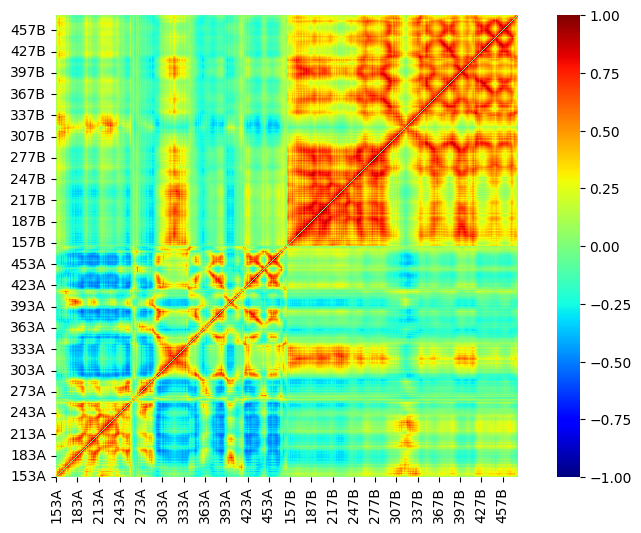

In [70]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corrmatactiveD, center=0, xticklabels=30, yticklabels=30, square=True,cmap='jet',vmin=-1, vmax=1)
plt.gca().invert_yaxis()

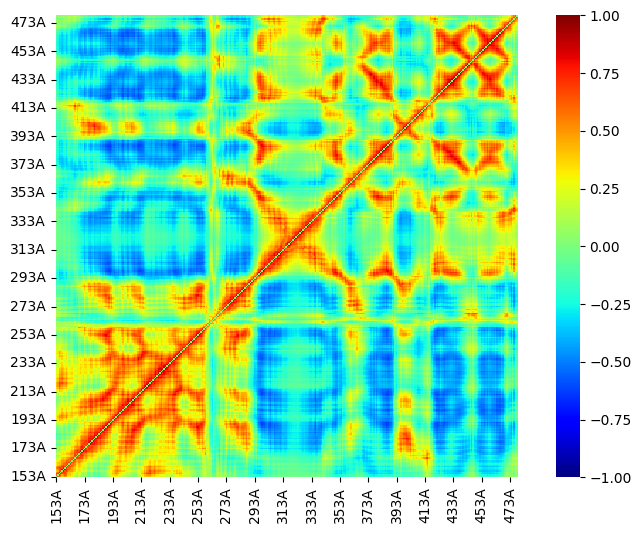

In [71]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corrmatactiveM, center=0, xticklabels=20, yticklabels=20, square=True,cmap='jet',vmin=-1, vmax=1)
plt.yticks(rotation=0) 
plt.gca().invert_yaxis()

In [54]:
#%matplotlib inline
## Create the heatmap
#plt.figure(figsize=(10, 6))
#
#sns.heatmap(corrmatinactiveD, center=0, xticklabels=50, yticklabels=50, square=True,cmap='jet',vmin=-1, vmax=1)

In [55]:
#%matplotlib inline
## Create the heatmap
#plt.figure(figsize=(10, 6))
#
#sns.heatmap(corrmatinactiveM, center=0, xticklabels=50, yticklabels=50, square=True,cmap='bwr',vmin=-1, vmax=1)

# RoG

In [73]:
dimer_3b3f_rog = pd.read_csv('../3b3f/dimer/analysis/rog_3b3f_dimer_400.dat', sep='\s+', header=None)
monomer_3b3f_rog = pd.read_csv('../3b3f/monomer/analysis/rog_3b3f_monomer_400.dat', sep='\s+', header=None)
dimer_3b3j_rog = pd.read_csv('../3b3j/dimer/analysis/rog_3b3j_dimer_400.dat', sep='\s+', header=None)
monomer_3b3j_rog = pd.read_csv('../3b3j/monomer/analysis/rog_3b3j_monomer_400.dat', sep='\s+', header=None)
dimer_3b3f_rog.columns = ['Frames','Rog','Rog_max']
monomer_3b3f_rog.columns = ['Frames','Rog','Rog_max']
dimer_3b3j_rog.columns = ['Frames','Rog','Rog_max']
monomer_3b3j_rog.columns = ['Frames','Rog','Rog_max']
dimer_3b3f_rog = dimer_3b3f_rog.apply(pd.to_numeric, errors='coerce')
monomer_3b3f_rog = monomer_3b3f_rog.apply(pd.to_numeric, errors='coerce')
dimer_3b3j_rog = dimer_3b3j_rog.apply(pd.to_numeric, errors='coerce')
monomer_3b3j_rog = monomer_3b3j_rog.apply(pd.to_numeric, errors='coerce')

# Exclude the first row
dimer_3b3f_rog = dimer_3b3f_rog.iloc[1:]
monomer_3b3f_rog = monomer_3b3f_rog.iloc[1:]
dimer_3b3j_rog = dimer_3b3j_rog.iloc[1:]
monomer_3b3j_rog = monomer_3b3j_rog.iloc[1:]
dimer_3b3f_rog.head(), print(dimer_3b3f_rog.dtypes)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_210/1265361861.py:1: SyntaxWarning: invalid escape sequence '\s'
  dimer_3b3f_rog = pd.read_csv('../3b3f/dimer/analysis/rog_3b3f_dimer_400.dat', sep='\s+', header=None)
/tmp/ipykernel_210/1265361861.py:2: SyntaxWarning: invalid escape sequence '\s'
  monomer_3b3f_rog = pd.read_csv('../3b3f/monomer/analysis/rog_3b3f_monomer_400.dat', sep='\s+', header=None)
/tmp/ipykernel_210/1265361861.py:3: SyntaxWarning: invalid escape sequence '\s'
  dimer_3b3j_rog = pd.read_csv('../3b3j/dimer/analysis/rog_3b3j_dimer_400.dat', sep='\s+', header=None)
/tmp/ipykernel_210/1265361861.py:4: Syntax

Frames     float64
Rog        float64
Rog_max    float64
dtype: object


(   Frames      Rog  Rog_max
 1     1.0  28.3912  38.9482
 2     2.0  28.7053  39.4423
 3     3.0  28.4547  39.9221
 4     4.0  28.4789  37.9465
 5     5.0  28.5780  39.8019,
 None)

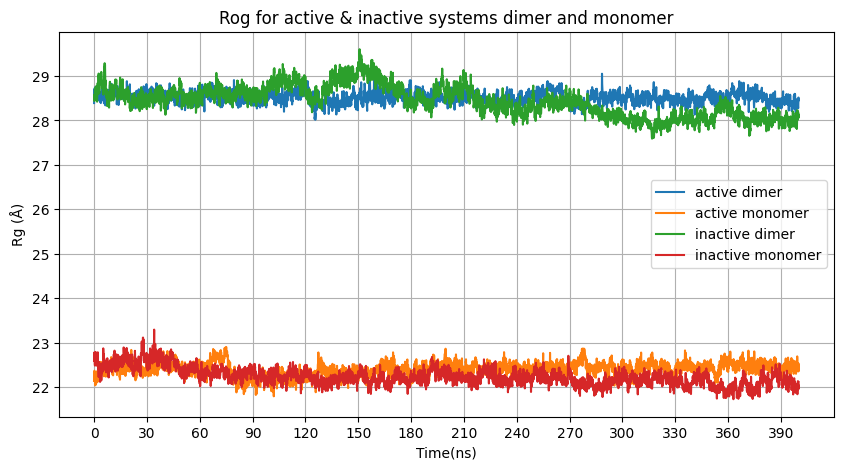

In [78]:
# Generate time axis for Rog plot. The trajectory was saved every 0.002 ns, and we have 125000 steps.
# time = nsteps * dt
total_time = 200000000 * 0.002 /1000
time = np.linspace(0, total_time, len(dimer_3b3f_rog))

%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(time, dimer_3b3f_rog['Rog'], label='active dimer')
plt.plot(time, monomer_3b3f_rog['Rog'], label='active monomer')
plt.plot(time, dimer_3b3j_rog['Rog'], label='inactive dimer')
plt.plot(time, monomer_3b3j_rog['Rog'], label='inactive monomer')
plt.xlabel('Time(ns)')
plt.ylabel('Rg (Å)')
plt.title('Rog for active & inactive systems dimer and monomer')
plt.legend()
plt.xticks(np.arange(0, 400, 30.0))
plt.grid(True)
plt.show()

## PCA

In [79]:
#pca files
dimer_3b3f_pca = pd.read_csv('../3b3f/dimer/analysis/pca3b3fDimer.dat', sep=r'\s+')
monomer_3b3f_pca = pd.read_csv('../3b3f/monomer/analysis/pca3b3fMonomer.dat', sep=r'\s+')
dimer_3b3j_pca = pd.read_csv('../3b3j/dimer/analysis/pca3b3jDimer.dat', sep=r'\s+')
monomer_3b3j_pca = pd.read_csv('../3b3j/monomer/analysis/pca3b3jMonomer.dat', sep=r'\s+')
dimer_3b3f_pca.head(), print(dimer_3b3f_pca.dtypes)

#Frame      int64
Mode1     float64
Mode2     float64
Mode3     float64
Mode4     float64
Mode5     float64
Mode6     float64
Mode7     float64
Mode8     float64
Mode9     float64
Mode10    float64
dtype: object


(   #Frame   Mode1   Mode2   Mode3   Mode4  Mode5   Mode6   Mode7  Mode8  \
 0       1  -8.197 -15.164  -4.806 -17.585  5.005 -10.088  19.162  1.374   
 1       2   7.634 -33.250  17.746 -17.561  5.161  -2.750   3.391 -6.184   
 2       3  10.520 -18.474   5.357 -14.023 -0.829  -1.923   8.298 -7.110   
 3       4  15.977 -20.115  10.988   1.104 -5.520  -7.355  15.940 -6.284   
 4       5  12.173 -21.718  11.837  -4.777  3.610 -10.445   4.067 -4.126   
 
     Mode9  Mode10  
 0 -12.760  -0.305  
 1 -13.124  -2.757  
 2 -11.422   3.584  
 3 -13.749  -7.098  
 4 -13.186  -3.950  ,
 None)

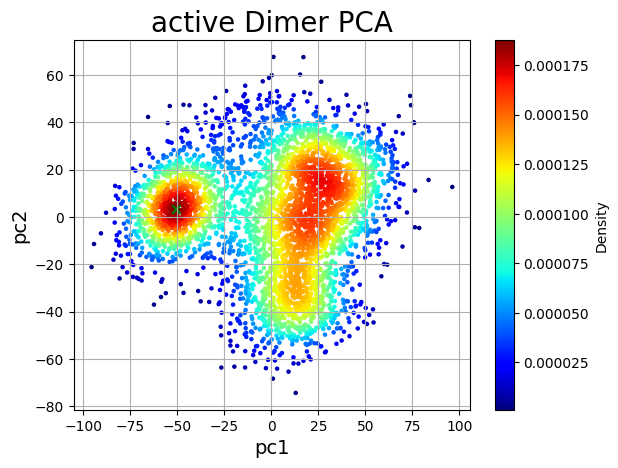

Conformation number with highest density in run 1: 3099


In [92]:
# PLOTTING activeD runs PCA
%matplotlib inline
# List of filenames
PCA_activeD_dfs = [dimer_3b3f_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_activeD_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()

    # Get the indices of the points with the density value higher than 0.0004
    #high_density_indices = np.where(z > 0.0006)[0]
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('active Dimer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")

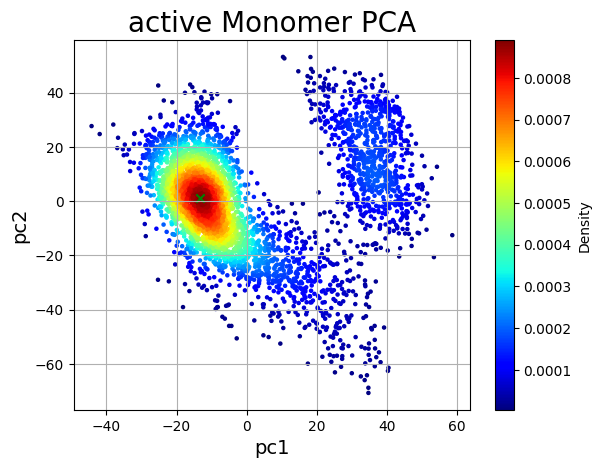

Conformation number with highest density: 3584


In [93]:
# PLOTTING activeM runs PCA
%matplotlib inline
# List of filenames
PCA_activeM_dfs = [monomer_3b3f_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_activeM_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()

    # Get the indices of the points with the density value higher than 0.0004
    #high_density_indices = np.where(z > 0.0006)[0]
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('active Monomer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")

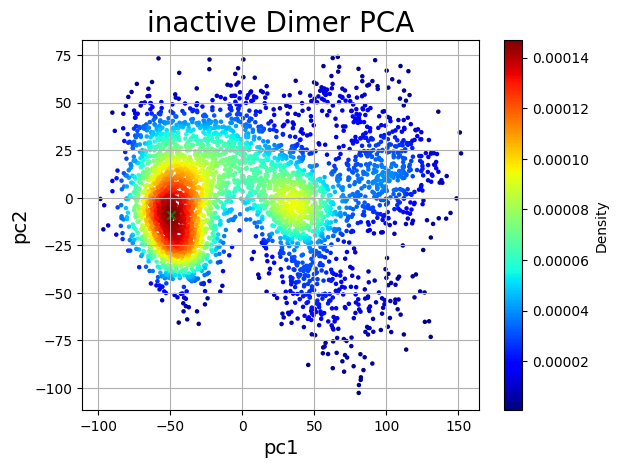

Conformation number with highest density: 3551


In [94]:
# PLOTTING inactiveD runs PCA
%matplotlib inline
# List of filenames
PCA_inactiveD_dfs = [dimer_3b3j_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_inactiveD_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()


    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('inactive Dimer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")

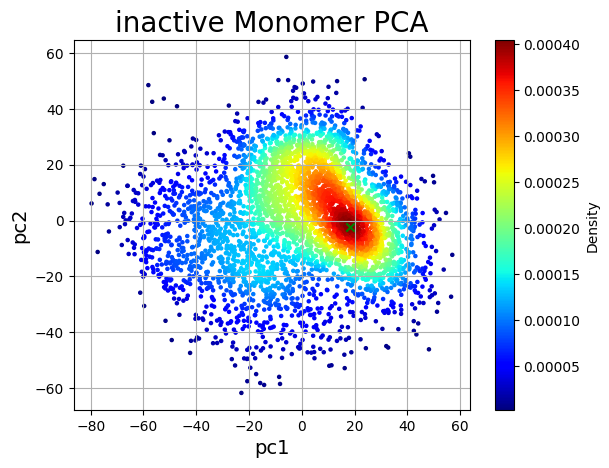

Conformation number with highest density: 1754


In [97]:
# PLOTTING inactiveM runs PCA
%matplotlib inline
# List of filenames
PCA_inactiveM_dfs = [monomer_3b3j_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_inactiveM_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('inactive Monomer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")